<h1 style="text-align: center; font-weight: bold; font-size: 2.5em;">Sistema de Recomendación de Locales Gastronómicos</h1>


## Introducción
Este proyecto busca desarrollar un sistema de recomendación que satisfaga las necesidades tanto de inversores interesados en identificar oportunidades gastronómicas rentables como de consumidores que desean explorar opciones de calidad. A través de técnicas de análisis de datos y aprendizaje automático, se construirán recomendaciones personalizadas.

En este caso, se analizará uno de los archivos clave del proyecto, el cual contiene información detallada sobre las reseñas (reviews) y las puntuaciones otorgadas (stars) a los locales gastronómicos por parte de los usuarios. Estos datos serán esenciales para comprender las preferencias de los consumidores y evaluar el desempeño de los locales, formando la base para las recomendaciones.

## Dataset y Documentación de Yelp

Para el desarrollo de este proyecto, utilizaremos el dataset público proporcionado por Yelp, el cual contiene información valiosa sobre negocios, reseñas, puntuaciones y datos relacionados. Puedes acceder a los recursos necesarios en los siguientes enlaces:

- **[Descargar el dataset de Yelp](https://www.yelp.com/dataset)**: Aquí podrás obtener el archivo completo con los datos en formato JSON.
- **[Documentación oficial del dataset](https://www.yelp.com/dataset/documentation/main)**: Consulta detalles sobre las estructuras de datos, descripciones de columnas y ejemplos para facilitar el análisis.

Estos recursos serán esenciales para construir nuestro sistema de recomendación, permitiendo extraer insights clave sobre las preferencias de los consumidores y el desempeño de los locales gastronómicos.

## Descripción de los datos (Diccionario)

Estas columnas proporcionan información clave sobre los consejos escritos por los usuarios, permitiendo analizar qué tipos de sugerencias tienen mayor impacto, qué usuarios son más activos, y cómo se distribuyen los consejos entre los negocios.


1. **`text`**:
   - **Descripción**: Texto breve que contiene el consejo o sugerencia del usuario sobre un negocio.
   - **Tipo**: Cadena de texto (string).
   - **Ejemplo**: `"Menú secreto: el sándwich de pollo frito es increíble. Sus zapatos también son buenos."`

2. **`date`**:
   - **Descripción**: Fecha en la que se escribió el consejo, con formato `YYYY-MM-DD`.
   - **Tipo**: Cadena de texto (string) que representa una fecha.
   - **Ejemplo**: `"2013-09-20"`

3. **`compliment_count`**:
   - **Descripción**: Número de cumplidos que recibió el consejo, indicando cuántas personas encontraron útil o interesante la sugerencia.
   - **Tipo**: Entero (integer).
   - **Ejemplo**: `172`

4. **`business_id`**:
   - **Descripción**: Identificador único de 22 caracteres que representa al negocio al que se refiere el consejo. Se puede relacionar con los datos en `business.json`.
   - **Tipo**: Cadena de texto (string).
   - **Ejemplo**: `"tnhfDv5Il8EaGSXZGiuQGg"`

5. **`user_id`**:
   - **Descripción**: Identificador único de 22 caracteres que representa al usuario que escribió el consejo. Se puede relacionar con los datos en `user.json`.
   - **Tipo**: Cadena de texto (string).
   - **Ejemplo**: `"49JhAJh8vSQ-vM4Aourl0g"`



# Limpieza y Análisis del Dataset:

### Se importan las librerías necesarias para el Procesamiento y Análisis

In [2]:
# Se importan las librerías a utilizar
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt

###  Carga del Dataset de Consejos (Tips)

In [3]:
# Se Crea un Dataframe con el archivo JSON
df = pd.read_json(r'C:\Users\Blasferp\Desktop\Data Science\Proyectos\No_Country\Yelp\Datasets\yelp_academic_dataset_tip.json', lines=True)

### Visualización General de los Datos


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


In [5]:
# Características generales
df.shape

(908915, 5)

### Descripción del DataFrame de Tips

Este DataFrame contiene información sobre consejos (tips) escritos por usuarios acerca de diferentes negocios. Cada fila representa un consejo individual. A continuación, se describen las columnas:

### Resumen del DataFrame
- **Número de filas**: 908,915
- **Número de columnas**: 5
- **Uso de memoria**: 34.7 MB



### Visualizacion del dataframe y las Variables

In [6]:
df.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


## Valores Nulos:

In [7]:
# Suma de Nulos por Columnas
df.isna().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

#### Observacion

- No se observan Valores Nulos en ninguna de las Variables.

## Duplicados

In [8]:
# Verificar si se encuentran Duplicados
filas_duplicadas = df.duplicated()
filas_duplicadas_total = filas_duplicadas.sum()
print(f'Cantidad de filas Duplicadas: {filas_duplicadas_total}')

Cantidad de filas Duplicadas: 67


In [9]:
# Filtrar las filas duplicadas
df_duplicados = df[filas_duplicadas]

# Mostrar las filas duplicadas
df_duplicados.head()


,user_id,business_id,text,date,compliment_count
29901,00Cz_vdInMHpTRjqbWjK5Q,ncacMQ9n_dSM1cR3c1vTQw,Miss saigon,2010-12-07 01:59:12,0
58887,47zMh_WgunwRDf7Cx2WyYw,J8vz_zwZaxzA585lV_k_vA,Com chien and mi are delish!,2011-07-23 17:22:58,0
99407,WQ8shYm0ghNDz97BuHI1fA,Sv1MEZP-mMfp8SmE0hwYEA,love the crispy buns!,2017-10-18 23:29:03,0
126358,hGxVvXVg7IK4J2aTiGMSIQ,5RsVAkDnMrcSbErS6P1eew,"Pricey, often crowded, and staff are not alway...",2017-10-20 22:08:25,0
129213,1gDoko0TrN0lnQlMC2JtXw,06PmqoU3uY5Vb-BEaMPVfw,"We ordered a pizza on New Year's Day, it never...",2014-02-20 04:09:37,0


In [10]:
# Eliminamos los duplicados
df = df.drop_duplicates()

In [11]:
# Resetear el indice
df.reset_index(drop=True, inplace=True)

In [12]:
# Verificamos que se hayan eliminado y el indice arreglado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908848 entries, 0 to 908847
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908848 non-null  object        
 1   business_id       908848 non-null  object        
 2   text              908848 non-null  object        
 3   date              908848 non-null  datetime64[ns]
 4   compliment_count  908848 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


## Columnas

In [13]:
# Eliminamos las columnas que no son necesarias en nuestro criterio
# df = df.drop(columns=['useful', 'funny', 'cool'])

In [14]:
# Obtener la frecuencia absoluta
cumplidos = df['compliment_count'].value_counts()

# Obtener el porcentaje de cada valor
cumplidos_porcentaje = df['compliment_count'].value_counts(normalize=True)

# Crear un DataFrame con las dos columnas: 'Frecuencia Absoluta' y 'Porcentaje'
resultado = pd.DataFrame({
    'Frecuencia Absoluta': cumplidos,
    'Porcentaje': cumplidos_porcentaje
})

# Visualizar el DataFrame
resultado


,Frecuencia Absoluta,Porcentaje
compliment_count,,
0,898309,0.988404
1,9821,0.010806
2,617,0.000679
3,82,0.000090
4,14,0.000015
5,3,0.000003
6,2,0.000002


#### Observación

En el análisis realizado, se observa que la columna `compliment_count` presenta una distribución altamente sesgada, con más del 98% de los valores siendo cero. Esto sugiere que la mayoría de las filas corresponden a registros en los que no se ha asignado un puntaje de manera explícita por parte de los usuarios, lo que podría ocurrir cuando no se proporcionan cumplidos o cuando estos son registrados de forma automática con el valor de cero.

**Detalles de la distribución:**
- El valor cero (`0`) representa el **98.8%** de las entradas en la columna, lo que indica que la mayoría de los registros no tienen cumplidos proporcionados.
- Los valores pequeños (1, 2, 3, etc.) representan solo el **1.2%** restante, lo que muestra una muy baja frecuencia de cumplidos por parte de los usuarios.

#### Decisión:
Debido a que más del **98%** de los valores son ceros y este comportamiento es probablemente indicativo de un valor predeterminado o automático, se decide eliminar la columna `compliment_count` del DataFrame. Esto permitirá reducir el tamaño de los datos y eliminar información que no aporta valor relevante para el análisis posterior, ya que la columna está mayormente compuesta por valores irrelevantes para la evaluación de los cumplidos.


In [15]:
# Se Elimina la Columna 'compliment_count'
df = df.drop(columns=['compliment_count'])

### Tipo de Variables

In [16]:
# Tipo de Dato de cada variable
print(df.dtypes)

user_id                object
business_id            object
text                   object
date           datetime64[ns]
dtype: object


In [17]:
# Cantidad de cada Variable
df.dtypes.value_counts()

object            3
datetime64[ns]    1
Name: count, dtype: int64

#### Observación

Al revisar los tipos de datos de cada columna en el DataFrame, encontramos que:

- **3 columnas** son de tipo `object` (cadenas de texto), que son:
  - `user_id`: Identificador único del usuario.
  - `business_id`: Identificador único del negocio.
  - `text`: Texto del tip.
  
- **1 columna** es de tipo `datetime64[ns]` (fecha y hora), que es:
  - `date`: Fecha en la que se escribió el tip.



## Analisis Univariado de Variables

In [18]:
# Establecer tema con más personalización
sns.set_theme(style="whitegrid", palette="viridis", font="Arial", rc={"axes.titlesize": 16, "axes.labelsize": 12})

In [19]:
# Observar las Variables Categóricas, sin la variable de tiempo
df.describe(exclude='datetime')


,user_id,business_id,text
count,908848,908848,908848
unique,301758,106193,851033
top,fCvMnJU1Z-XhAjKg99wK3Q,FEXhWNCMkv22qG04E83Qjg,Great food
freq,4071,2571,597


**Columna `user_id`:**
   - **`count`**: Hay 908,848 registros de `user_id`, lo que indica que todas las filas tienen un valor asignado para esta columna.
   - **`unique`**: Existen 301,758 usuarios diferentes en el conjunto de datos. Esto sugiere que muchos usuarios han dejado múltiples comentarios, ya que la cantidad de valores únicos es significativamente menor que el número total de registros.
   - **`top`**: El `user_id` más frecuente es `'fCvMnJU1Z-XhAjKg99wK3Q'`, con 4,071 registros, lo que indica que este usuario ha dejado una cantidad considerable de comentarios en la plataforma.
   - **`freq`**: El valor más frecuente en esta columna tiene una frecuencia de 4,071, lo que refuerza la idea de que algunos usuarios están muy activos, dejando varios comentarios.

**Columna `business_id`:**
   - **`count`**: Al igual que con `user_id`, todos los registros tienen un valor asignado en la columna `business_id`.
   - **`unique`**: Hay 106,193 negocios únicos, lo que sugiere que hay una amplia variedad de empresas en el conjunto de datos.
   - **`top`**: El `business_id` más frecuente es `'FEXhWNCMkv22qG04E83Qjg'`, con 2,571 registros, lo que indica que este negocio ha recibido varios comentarios, posiblemente debido a su popularidad o actividad.
   - **`freq`**: La frecuencia máxima es 2,571, lo que muestra que algunos negocios tienen muchos comentarios, lo cual es típico en plataformas con muchas interacciones de usuarios.

**Columna `text`:**
   - **`count`**: Todos los registros tienen un valor de texto, lo que indica que ningún comentario está vacío.
   - **`unique`**: Hay 851,033 textos únicos, lo que refleja la diversidad de comentarios y opiniones en la plataforma.
   - **`top`**: El comentario más frecuente es `'Great food'`, lo que podría ser un elogio común en los comentarios sobre restaurantes o negocios relacionados con la comida.
   - **`freq`**: El comentario `'Great food'` aparece 597 veces, lo que indica que es una frase muy popular y probablemente un comentario comúnmente dejado por los usuarios satisfechos.

#### Resumen de la Observación:
- **Usuarios activos**: Un número significativo de usuarios deja múltiples comentarios, y uno de ellos ha dejado 4,071 comentarios.
- **Negocios populares**: Existen una amplia variedad de negocios, pero algunos, como el identificado por `'FEXhWNCMkv22qG04E83Qjg'`, reciben más interacciones que otros.
- **Comentarios recurrentes**: Aunque los comentarios son variados, hay frases comunes que se repiten con frecuencia, como `'Great food'`, lo que refleja una tendencia de comentarios positivos comunes sobre ciertos aspectos de los negocios.

**Decisión para eliminar o limpiar datos**: Se puede considerar limpiar y agrupar los comentarios similares para mejorar la calidad del análisis. Además, podría ser útil investigar qué tipo de negocios o usuarios dejan estos comentarios recurrentes, ya que podrían influir en la percepción de la plataforma o el negocio.

### Variable Temporal

In [20]:
# Observamos el periodo de los Tips
print(f'La fecha Minima de los Tips es: {df["date"].min()}')
print(f'La fecha Maxima de los Tips es: {df["date"].max()}')

La fecha Minima de los Tips es: 2009-04-16 13:11:49
La fecha Maxima de los Tips es: 2022-01-19 20:38:55


In [21]:
# Creamos las Variables 'Year' y 'Month' para un mejor análisis
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month


In [22]:
# Agruppamos por 'Year' y 'Month' para tener la frecuencia de Tips
df_tiempo = df.groupby(['Year', 'Month']).size().reset_index(name='Frecuencia')
df_tiempo

,Year,Month,Frecuencia
0,2009,4,47
1,2009,5,64
2,2009,6,72
3,2009,7,75
4,2009,8,92
...,...,...,...
149,2021,9,2708
150,2021,10,2868
151,2021,11,2785
152,2021,12,1777


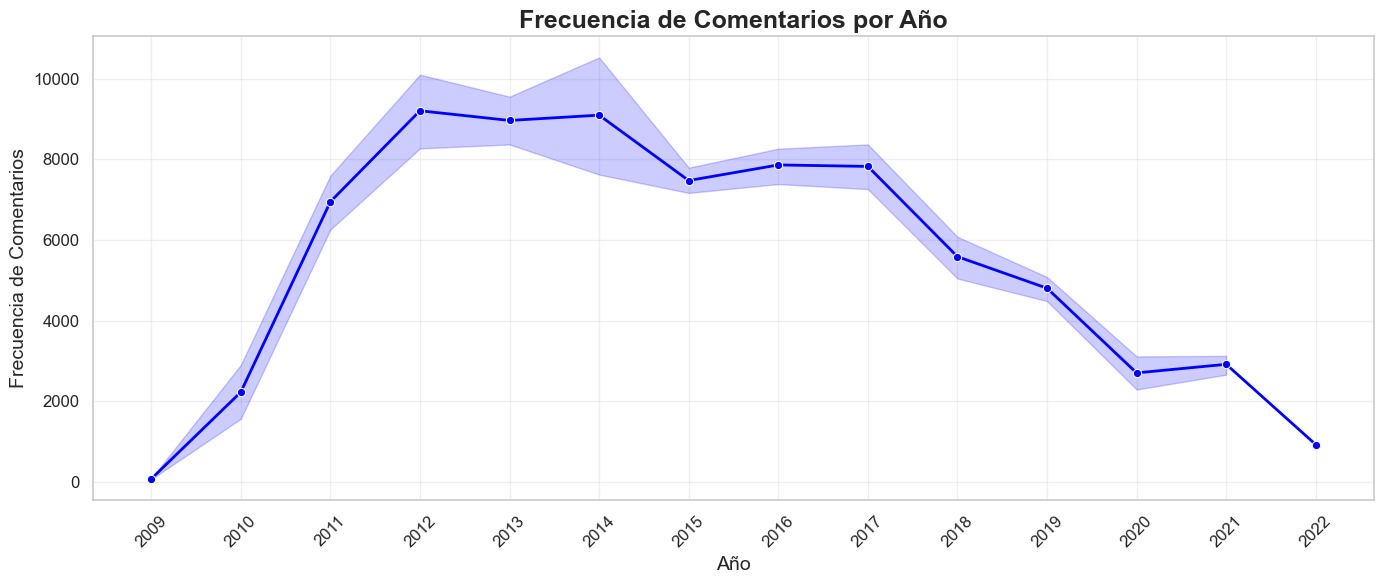

In [23]:
# Crear el gráfico de línea
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=df_tiempo, x='Year', y='Frecuencia', marker='o', color='blue', linewidth=2)

# Agregar detalles al gráfico
ax.set_title('Frecuencia de Comentarios por Año', fontsize=18, fontweight='bold')
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Frecuencia de Comentarios', fontsize=14)
ax.grid(alpha=0.3)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(df_tiempo['Year'].unique())  # Mostrar cada año en el eje x

# Rotar etiquetas si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




#### **Tendencias Generales**
- **Incremento Inicial (2009-2012):** 
  Se observa un crecimiento constante en la frecuencia desde abril de 2009 hasta 2012. Esto puede deberse a un aumento en la actividad del sistema o base de datos, o a un crecimiento natural en la popularidad de los servicios relacionados.
  - 2009 inicia con valores bajos (47-91).
  - 2012 culmina con frecuencias altas, superando las 10,000 observaciones mensuales.

- **Estabilización y Descenso (2013-2018):**
  - Después de 2013, las frecuencias mensuales muestran fluctuaciones moderadas, con una tendencia general descendente a partir de 2015.
  - En 2018 se registra una caída significativa, terminando con menos de 5,000 observaciones mensuales.

- **Impacto de 2020:**
  - La frecuencia disminuye drásticamente en marzo y abril de 2020 (2,700 y 1,174 respectivamente), coincidiendo con el inicio de la pandemia de COVID-19. Este patrón refleja un impacto directo en la actividad registrada.

- **Recuperación Parcial (2021):**
  - Aunque los valores vuelven a aumentar en 2021, no alcanzan los niveles previos a 2018, mostrando una recuperación lenta y parcial.


#### **Comportamiento Anual**
- **Picos y Temporada Alta:**
  - En la mayoría de los años, los meses de junio a agosto presentan frecuencias más altas, lo que podría estar relacionado con una mayor demanda estacional o eventos específicos.
  - Los meses de diciembre muestran menor actividad relativa, excepto en 2009 y 2012.

- **Anomalías Notables:**
  - **2020:** Es el único año con una caída tan marcada y sostenida en la frecuencia, evidenciando un evento disruptivo (como la pandemia).
  - **2011-2013:** Estos años muestran una estabilidad inusualmente alta con valores mensuales consistentemente superiores a 7,000.


#### **Observaciones por Periodos Específicos**
- **Años con Mayor Actividad:**
  - El año **2012** marca el punto más alto, con meses que superan frecuentemente las 10,000 observaciones.
  - **2011 y 2013** también presentan una actividad destacada.

- **Años con Menor Actividad:**
  - Los valores de **2018 en adelante** reflejan una disminución continua, con el año 2020 siendo el más afectado.

#### **Conclusiones**
- Los datos reflejan una historia de crecimiento, estabilización, caída y recuperación parcial.
- Las tendencias podrían estar influenciadas por factores externos como eventos globales (COVID-19), cambios en la infraestructura, o una reducción en la actividad de los usuarios.
- Es importante analizar más a fondo qué eventos o cambios específicos impactaron los años más notables como 2012 (máximo) y 2020 (mínimo).



### Guardar el Dataframe Final

In [24]:
# Se guarda el DataFrame Final para comenzar con el análisis y procesamiento
df.to_parquet(f"df_yelp_tips.parquet")

---
---